In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
ls *csv

abalone.csv  AnscombesQuartet.csv  BULLMARKET.csv  somedata.csv  wine-data.csv


In [58]:
df = pd.read_csv("wine-data.csv")
df[1595:1605]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red
1599,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1600,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
1601,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
1602,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
1603,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
1604,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white


In [59]:
#Use Sulphates for X, Red/White for Y

In [60]:
X = np.array(df["sulphates"]).reshape(-1,1)

In [61]:
Y = [1 if value=="red" else 0 for value in df["type"]]
Y[1595:1605]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

Text(0, 0.5, 'Red/White')

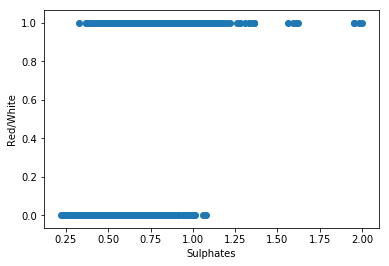

In [62]:
plt.scatter(X,Y)
plt.xlabel("Sulphates")
plt.ylabel("Red/White")

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y)

In [65]:
#fit the model

In [66]:
LR = LogisticRegression()
sulphate_model = LR.fit(XTRAIN, YTRAIN)
sulphate_prediction = sulphate_model.predict(XTEST)
accuracy_score(YTEST, sulphate_prediction)

/opt/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7766153846153846

In [67]:
CM = confusion_matrix(YTEST, sulphate_prediction)
CM

array([[1132,   69],
       [ 294,  130]])

In [68]:
xvals=np.linspace(0.1, 2, 100).reshape(-1,1)
yvals=sulphate_model.predict_proba(xvals)[:,1]
yvals

array([0.00724646, 0.00848337, 0.0099293 , 0.01161878, 0.01359178,
       0.01589444, 0.01857985, 0.02170896, 0.02535144, 0.02958661,
       0.03450424, 0.04020538, 0.04680285, 0.05442155, 0.06319821,
       0.07328061, 0.08482587, 0.09799771, 0.11296244, 0.12988329,
       0.14891325, 0.17018606, 0.19380576, 0.21983514, 0.2482838 ,
       0.27909694, 0.31214622, 0.34722407, 0.38404298, 0.42224071,
       0.4613918 , 0.50102502, 0.54064537, 0.57975847, 0.61789495,
       0.65463224, 0.68961173, 0.72254996, 0.75324351, 0.78156802,
       0.80747226, 0.83096886, 0.85212303, 0.87104063, 0.88785663,
       0.90272475, 0.91580855, 0.92727432, 0.93728554, 0.94599889,
       0.95356162, 0.96010987, 0.9657679 , 0.97064792, 0.97485039,
       0.97846451, 0.98156909, 0.98423332, 0.98651772, 0.98847502,
       0.990151  , 0.99158533, 0.99281229, 0.99386145, 0.99475828,
       0.99552468, 0.99617945, 0.99673874, 0.99721638, 0.99762423,
       0.99797245, 0.99826971, 0.99852346, 0.99874005, 0.99892

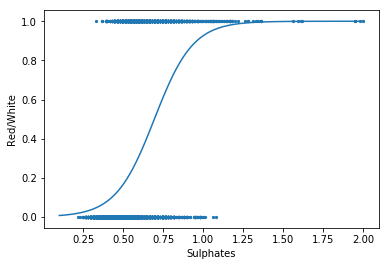

In [69]:
plt.scatter(X,Y,s=5)
plt.xlabel("Sulphates")
plt.ylabel("Red/White")
plt.plot(xvals,yvals)

In [70]:
from sklearn.metrics import roc_curve

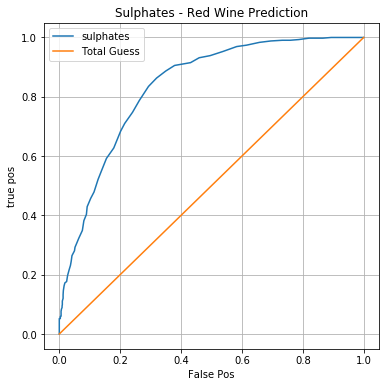

In [74]:
SY = sulphate_model.predict_proba(XTEST)[:,1]
SFPR, STPR, STHRESH = roc_curve(YTEST, SY)
plt.plot(SFPR, STPR, label="sulphates")
plt.plot([0,1],[0,1],label="Total Guess")
plt.legend()
plt.grid()
plt.xlabel("False Pos")
plt.ylabel("true pos")
plt.title("Sulphates - Red Wine Prediction")

plt.gcf().set_size_inches(6,6)

In [77]:
X=np.array(df.drop(columns=["quality","type"]))
XTRAINALL, XTESTALL, YTRAINALL, YTESTALL = train_test_split(X, Y)
big_model = LR.fit(XTRAINALL, YTRAINALL)
YP_big=big_model.predict(XTESTALL)
accuracy_score(YP_big, YTESTALL)

/opt/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9796923076923076

In [79]:
CM = confusion_matrix(YP_big, YTESTALL)
CM

array([[1222,   21],
       [  12,  370]])

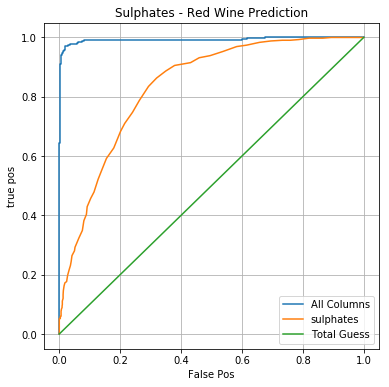

In [84]:
PROB_ALL=big_model.predict_proba(XTESTALL)[:,1]
SFPRALL, STPRALL, STHRESHALL = roc_curve(YTESTALL, PROB_ALL)

plt.plot(SFPRALL, STPRALL, label="All Columns")
plt.plot(SFPR, STPR, label="sulphates")
plt.plot([0,1],[0,1],label="Total Guess")
plt.legend()
plt.grid()
plt.xlabel("False Pos")
plt.ylabel("true pos")
plt.title("Sulphates - Red Wine Prediction")

plt.gcf().set_size_inches(6,6)